## Task 3

### To Explore Unsupervised Machine Learning

**Problem Statement**

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [1]:
# path to file
path ="Iris.csv"

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# laoding the data
data =pd.read_csv(path)

In [4]:
# Observing the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Checking the distribution of data before clustering**

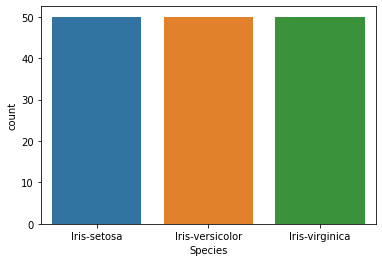

In [9]:
sns.countplot(data["Species"])

In [16]:
# Dropping the columns not useful for clustering 
X =data.drop(['Id','Species'], axis =1)

In [17]:
X[0:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


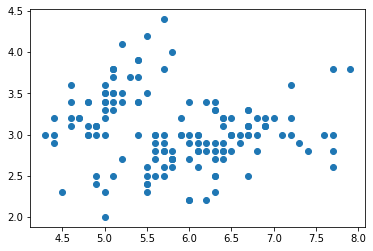

In [9]:
# Before clustering
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'])

### Preprocessing the data

In [19]:
# instance of MinMax Scaler
scaler =MinMaxScaler()

In [20]:
# preprocessing the data
X =scaler.fit_transform(X)

In [21]:
# data after scaling
X[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### Determining the optimal number of clusters 

It is a tedious task to find out the optimal number of clusters in KMeans, we use two methods to get the optimal number of clusters
1. Elbow method
2. Silhouette Analysis

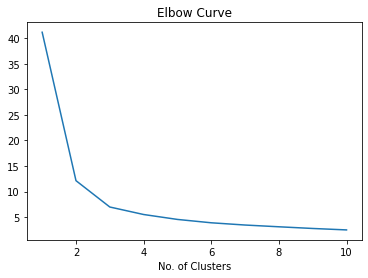

In [23]:
# using elbow curve
no_of_clusters =[1,2,3,4,5,6,7,8,9,10]
ssd =[] # sum of squared distances

for n in no_of_clusters:
    km =KMeans(n_clusters= n, max_iter =50, init='k-means++')
    km.fit(X)
    ssd.append(km.inertia_)

plt.plot(no_of_clusters,ssd)
plt.title("Elbow Curve")
plt.xlabel("No. of Clusters")
plt.show()

As we can observe in the above curve at `n=3` the first elbow occurs and after it the deviation is constant, hence we can go with 3 clusters

### Silhouette analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [27]:
for n in range(2,11):
    km =KMeans(n_clusters= n, max_iter =50, init ='k-means++')
    km.fit(X)
    cluster_labels =km.labels_
    
    silhouette_val =silhouette_score(X, cluster_labels)
    print("The Silhouette score with {0} clusters is {1}".format(n,silhouette_val))


The Silhouette score with 2 clusters is 0.6294675561906644
The Silhouette score with 3 clusters is 0.5043188549150884
The Silhouette score with 4 clusters is 0.4446273300650682
The Silhouette score with 5 clusters is 0.3500373266251631
The Silhouette score with 6 clusters is 0.3545043458873336
The Silhouette score with 7 clusters is 0.34697739148153045
The Silhouette score with 8 clusters is 0.33389800976087375
The Silhouette score with 9 clusters is 0.32159948610709044
The Silhouette score with 10 clusters is 0.32541788944881955


From Silhouette analysis we can observe that at `n=3` there is significantly good value of silhouette score after which the value is constantly decreasing, hence we will use KMeans with n=3

### Performing KMeans clustering with n=3

In [28]:
km =KMeans(n_clusters=3 ,max_iter= 50, init='k-means++')

In [29]:
km.fit(X)

KMeans(max_iter=50, n_clusters=3)

In [30]:
# the cluster labels as predicted by k-means
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [31]:
# assigning clusters to data points
data['cluster_id'] =km.labels_

In [32]:
# cluster centroids
centroids =pd.DataFrame(km.cluster_centers_)

In [33]:
centroids 

,0,1,2,3
0,0.441257,0.307377,0.575715,0.549180
1,0.196111,0.590833,0.078644,0.060000
2,0.707265,0.450855,0.797045,0.824786


In [54]:
# getting actual value of centroids
centroids =scaler.inverse_transform(centroids)

In [55]:
centroids

array([[5.88852459, 2.73770492, 4.39672131, 1.41803279],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.84615385, 3.08205128, 5.7025641 , 2.07948718]])

### Visualizing the clusters formed

<Figure size 720x1080 with 0 Axes>

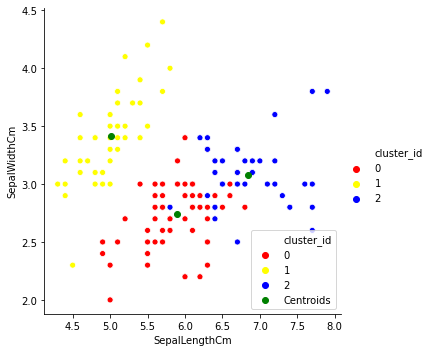

In [67]:
fig =plt.figure(figsize=(10,15))
sns.relplot(x ='SepalLengthCm', y='SepalWidthCm',hue ='cluster_id',data =data, palette=['red', 'yellow', 'blue'])
plt.scatter(x =centroids[:,0], y=centroids[:,1], c='green', label ='Centroids')
plt.legend()
plt.show()

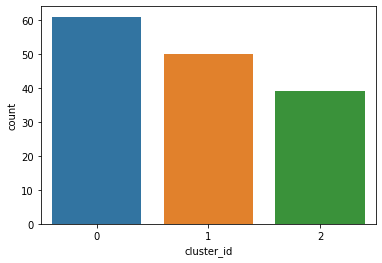

In [59]:
sns.countplot(data['cluster_id'])

In [68]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_id
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [69]:
data['cluster_id'].value_counts()

0    61
1    50
2    39
Name: cluster_id, dtype: int64

In [70]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**Without any knowledge of the existing clusters KMeans predicted 3 clusters with value counts approximately equal to the actual counts of the species**